In [85]:
# CS180 (CS280A): Project 1 starter Python code

# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
import skimage.io as skio
import os
from skimage import img_as_ubyte

# name of the input file
imname = "cs180 proj1 data/cathedral.jpg"
imnames_jpgs = [
    "cs180 proj1 data/cathedral.jpg",
    "cs180 proj1 data/monastery.jpg",
    "cs180 proj1 data/tobolsk.jpg"
    ]

imname = "cs180 proj1 data/harvesters.tif"
imnames_tifs = [
    "cs180 proj1 data/church.tif", 
    "cs180 proj1 data/emir.tif",
    "cs180 proj1 data/harvesters.tif",
    "cs180 proj1 data/icon.tif",
    "cs180 proj1 data/harvesters.tif", 
    "cs180 proj1 data/icon.tif", 
    "cs180 proj1 data/italil.tif", 
    "cs180 proj1 data/lastochikino.tif", 
    "cs180 proj1 data/lugano.tif", 
    "cs180 proj1 data/melons.tif", 
    "cs180 proj1 data/self_portrait.tif", 
    "cs180 proj1 data/siren.tif",
    "cs180 proj1 data/three_generations.tif"
    ]

In [86]:
# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)
from skimage.transform import rescale
def L2_norm(im1, im2):
    assert (im1.shape == im2.shape)
    crop = max(im1.shape) // 10
    im1_crop = im1[crop:-crop, crop:-crop]
    im2_crop = im2[crop:-crop, crop:-crop]

    return np.sqrt(np.sum(np.square(im1_crop - im2_crop)))

def NCC(im1, im2):
    assert (im1.shape == im2.shape)
    crop = max(im1.shape) // 10

    im1_crop = im1[crop:-crop, crop:-crop]
    im2_crop = im2[crop:-crop, crop:-crop]

    im1_standardized = (im1_crop - np.mean(im1_crop)) / np.std(im1_crop)
    im2_standardized = (im2_crop - np.mean(im2_crop)) / np.std(im2_crop)
    return np.mean(im1_standardized * im2_standardized)



def align(im1, target_im, displacement, scoring_func, center=(0,0)):
    best_score = float('-inf')
    best_alignment = im1
    best_shift = (0,0)
    for dx in range(-displacement + center[0], displacement + center[0]):
        for dy in range(-displacement + center[1], displacement + center[1]):
            displaced_image = np.roll(im1, (dx, dy), (1,0))
            score = scoring_func(displaced_image, target_im)
            if score > best_score:
                best_score = score
                best_alignment = displaced_image
                best_shift = (dx, dy)
    return best_alignment, best_shift


def image_pyramid(im1, im2, displacement, scoring_func, limit=300, depth=4):
    assert (im1.shape == im2.shape)
    if min(im1.shape) < limit or depth < 0:
        small_alignment, small_shift = align(im1, im2, displacement, scoring_func)
        return small_alignment, small_shift

    smaller_im1 = rescale(im1, 0.5, anti_aliasing=True)
    smaller_im2 = rescale(im2, 0.5, anti_aliasing=True)
    small_image, small_shifts = image_pyramid(smaller_im1, smaller_im2, displacement, scoring_func, limit, depth-1)
    scaled_shift = (small_shifts[0] * 2, small_shifts[1] * 2)
    return align(im1, im2, displacement, scoring_func, center=scaled_shift) 

Image shape: (341, 390)
cathedral simple aligned
g_shift (2, 5)
r_shift (3, 12)


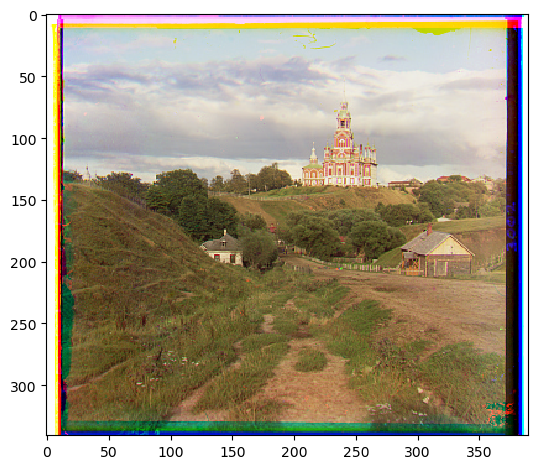

Image shape: (341, 391)
monastery simple aligned
g_shift (2, -3)
r_shift (2, 3)


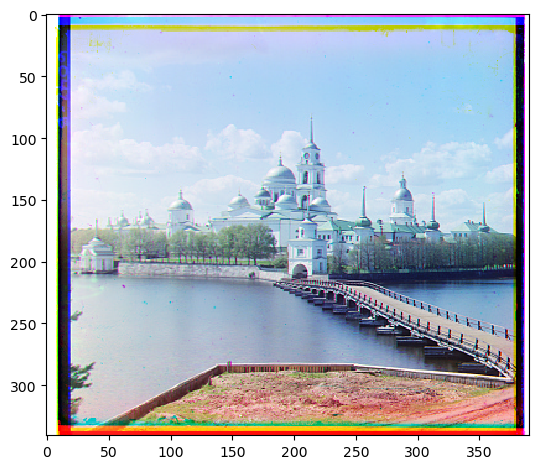

Image shape: (341, 396)
tobolsk simple aligned
g_shift (3, 3)
r_shift (3, 6)


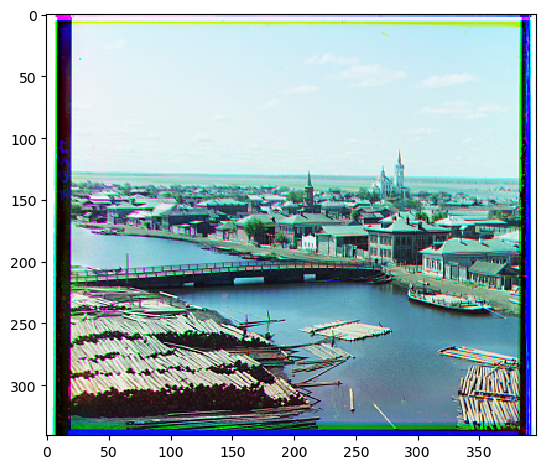

In [87]:
jpg_names = []
tif_names = []
for imname in imnames_jpgs:
    # read in the image
    im = skio.imread(imname)

    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)
        
    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(int)

    # separate color channels
    b = im[:height]
    g = im[height: 2*height]
    r = im[2*height: 3*height]
    print("Image shape:", b.shape)

    # Small image code
    ag, g_shift = align(g, b, 20, NCC)
    ar, r_shift = align(r, b, 20, NCC)
    # create a color image
    im_out = np.dstack([ar, ag, b])

    filename = os.path.basename(imname)
    name, image_type = os.path.splitext(filename)

    jpg_names.append(name)

    fname = f"out_path/small_images/simple_align_NCC_{name}.jpg"

    print(name, "simple aligned")
    print("g_shift", g_shift)
    print("r_shift", r_shift)
    
    saveable_image = img_as_ubyte(np.clip(im_out, 0, 1))
    skio.imsave(fname, saveable_image)

    # display the image
    skio.imshow(im_out)
    skio.show()

Image shape: (3202, 3634)
church pyramid aligned
g_shift (4, 25)
r_shift (-4, 58)


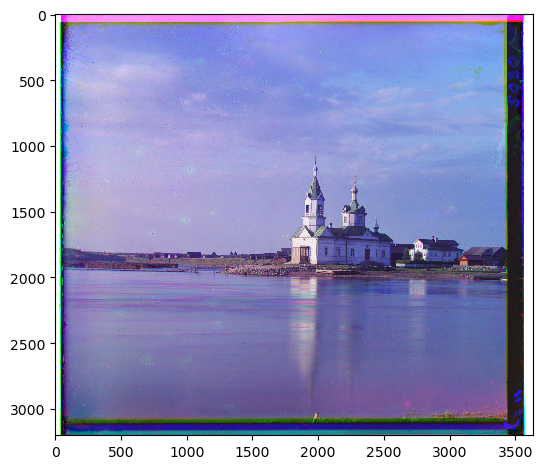

Image shape: (3209, 3702)
emir pyramid aligned
g_shift (24, 49)
r_shift (56, 104)


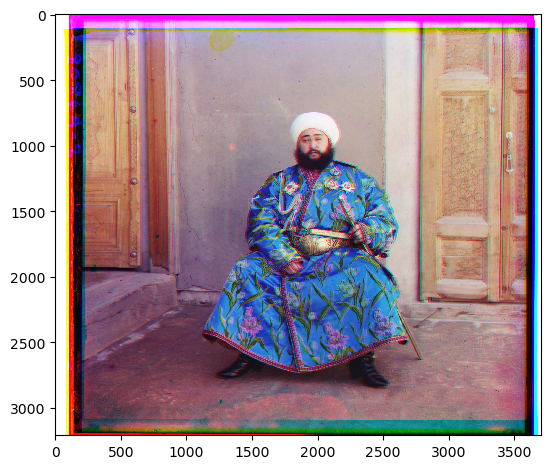

Image shape: (3218, 3683)
harvesters pyramid aligned
g_shift (17, 60)
r_shift (14, 124)


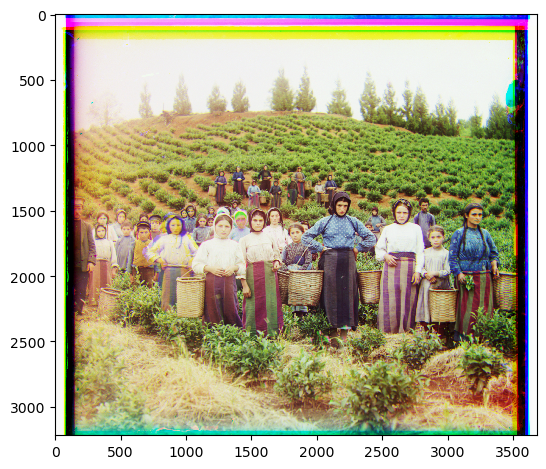

Image shape: (3244, 3741)
icon pyramid aligned
g_shift (17, 41)
r_shift (23, 89)


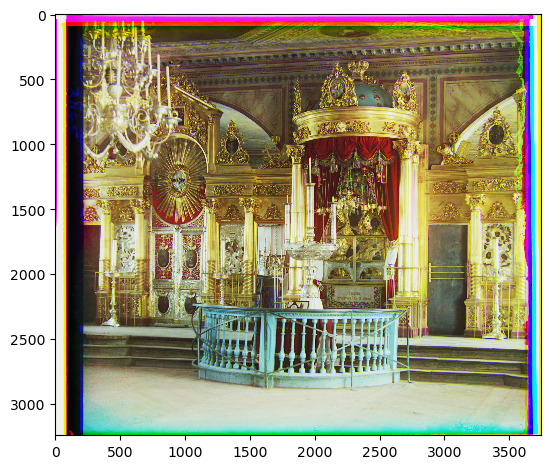

Image shape: (3218, 3683)
harvesters pyramid aligned
g_shift (17, 60)
r_shift (14, 124)


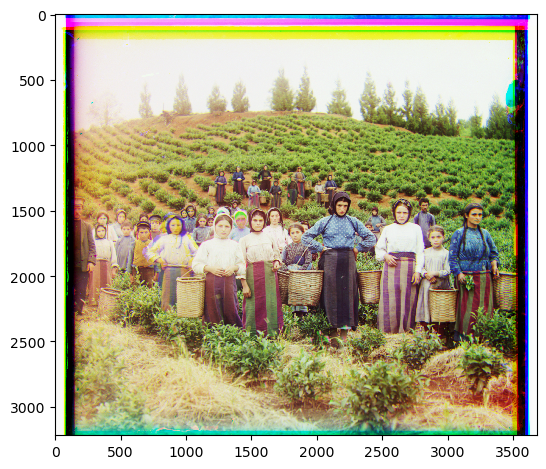

Image shape: (3244, 3741)
icon pyramid aligned
g_shift (17, 41)
r_shift (23, 89)


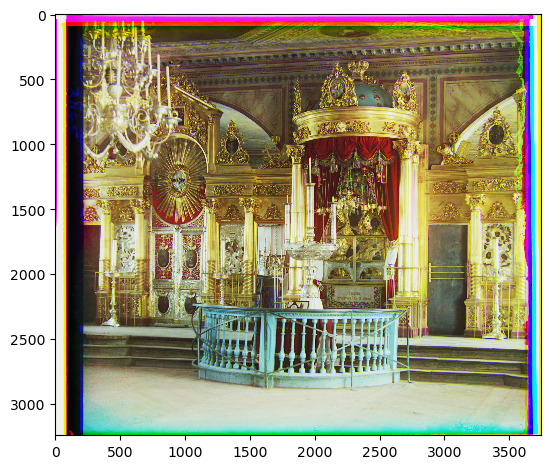

Image shape: (3231, 3719)
italil pyramid aligned
g_shift (21, 38)
r_shift (35, 76)


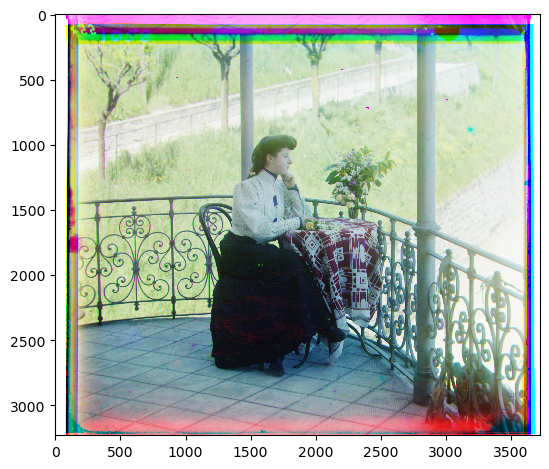

Image shape: (3241, 3700)
lastochikino pyramid aligned
g_shift (-2, -3)
r_shift (-9, 75)


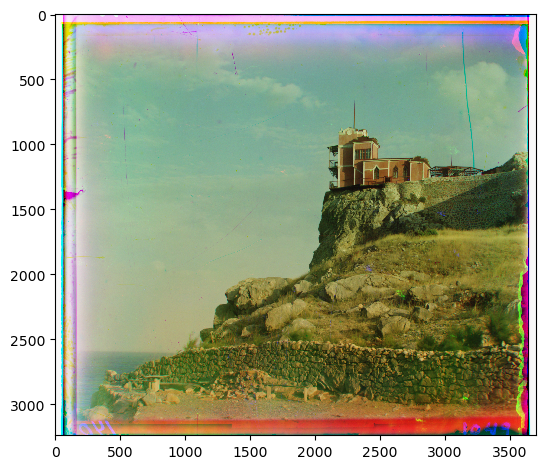

Image shape: (3244, 3779)
lugano pyramid aligned
g_shift (-16, 41)
r_shift (-29, 93)


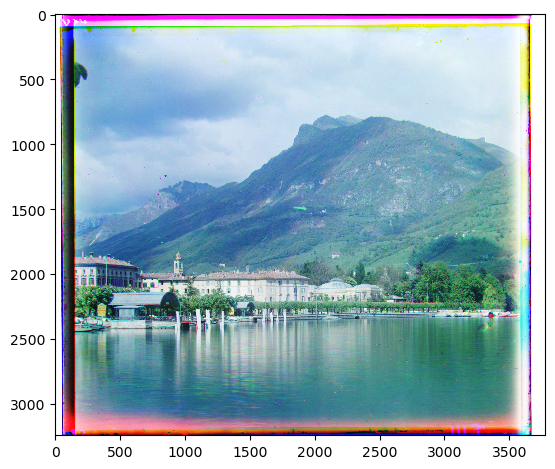

Image shape: (3241, 3770)
melons pyramid aligned
g_shift (10, 81)
r_shift (13, 178)


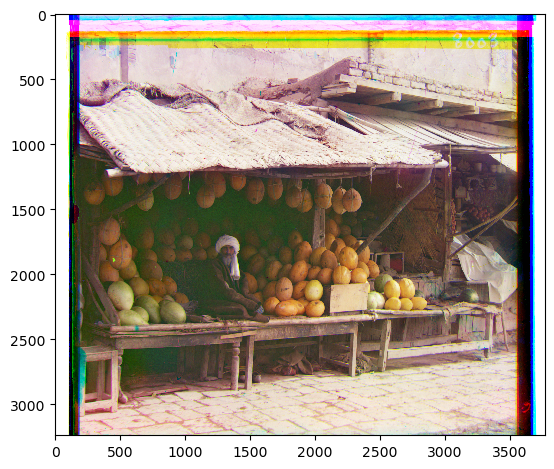

Image shape: (3251, 3810)
self_portrait pyramid aligned
g_shift (29, 79)
r_shift (37, 176)


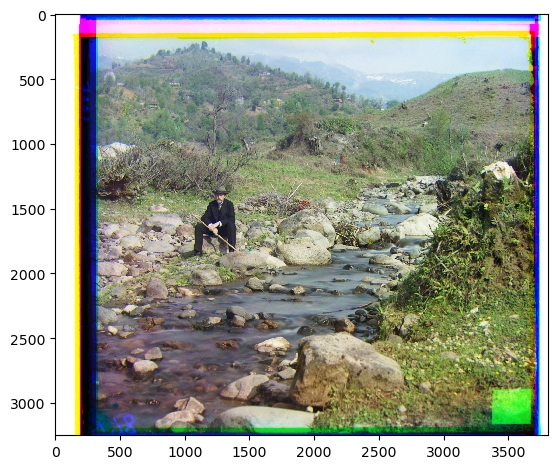

Image shape: (3250, 3817)
siren pyramid aligned
g_shift (-6, 49)
r_shift (-25, 96)


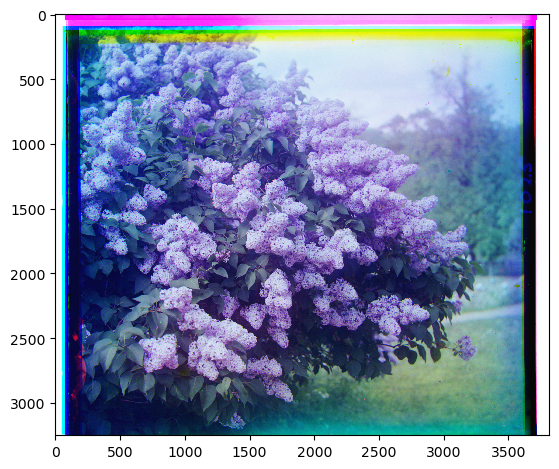

Image shape: (3209, 3714)
three_generations pyramid aligned
g_shift (14, 53)
r_shift (11, 111)


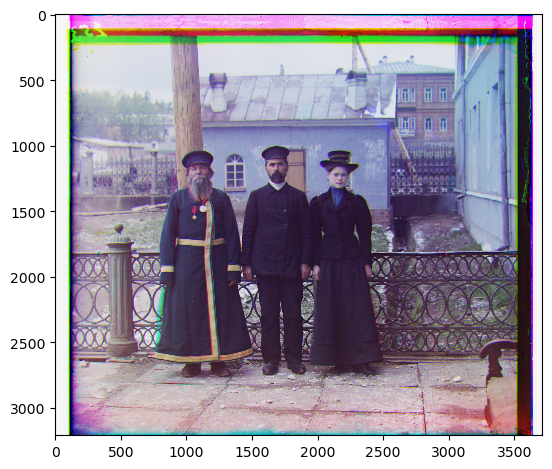

In [88]:
for imname in imnames_tifs:
    # read in the image
    im = skio.imread(imname)

    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)
        
    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(int)

    # separate color channels
    b = im[:height]
    g = im[height: 2*height]
    r = im[2*height: 3*height]
    print("Image shape:", b.shape)

    # Small image code
    ag, g_shift = image_pyramid(g, b, 10, NCC)
    ar, r_shift = image_pyramid(r, b, 10, NCC)
    # create a color image
    im_out = np.dstack([ar, ag, b])

    filename = os.path.basename(imname)
    name, image_type = os.path.splitext(filename)

    jpg_names.append(name)

    fname = f"out_path/large_images/pyramid_NCC_{name}.jpg"

    print(name, "pyramid aligned")
    print("g_shift", g_shift)
    print("r_shift", r_shift)
    
    saveable_image = img_as_ubyte(np.clip(im_out, 0, 1))
    skio.imsave(fname, saveable_image)

    # display the image
    skio.imshow(im_out)
    skio.show()